<a href="https://colab.research.google.com/github/sdgroeve/D012513A-Specialised-Bio-informatics-Machine-Learning/blob/main/scikit-learn-example/example_scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

# Dataset


The MNIST dataset<sup>1</sup> (Modified National Institute of Standards and Technology dataset) is a large dataset containing pre-processed **28x28 pixel** images of handwritten digits. The dataset is widely used for training and testing in the field of machine learning.

<sub>[1] THE MNIST DATABASE of handwritten digits, Yann LeCun, Courant Institute, NYU Corinna Cortes, Google Labs, New York Christopher J.C. Burges, Microsoft Research, Redmond.</sub>

Scikit-learn has function to load datasets from cloud. As MNIST is well known dataset we can just load it as follows:

In [45]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=True, cache=True)

To speedup running times we randomly sample 3000 datapoints from the dataset.

We put the feature vectors in `X` and the label in `y`:

In [46]:
data = mnist.frame.sample(3000)
X = data
y = list(data.pop("class"))

In [47]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
10376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
print(y)

['1', '1', '4', '3', '3', '8', '4', '1', '0', '5', '0', '6', '5', '8', '6', '1', '3', '8', '9', '8', '8', '5', '6', '2', '4', '8', '6', '7', '5', '3', '9', '9', '9', '3', '2', '9', '0', '2', '4', '4', '0', '3', '2', '3', '5', '1', '6', '7', '4', '4', '5', '9', '0', '2', '5', '7', '0', '5', '6', '6', '2', '0', '0', '2', '7', '5', '9', '2', '5', '7', '8', '5', '1', '5', '4', '9', '5', '3', '0', '2', '8', '8', '9', '4', '8', '3', '0', '5', '8', '3', '3', '7', '6', '2', '8', '8', '6', '1', '6', '6', '2', '3', '0', '4', '1', '7', '4', '4', '9', '4', '0', '3', '7', '8', '1', '2', '8', '2', '7', '0', '7', '1', '8', '8', '0', '4', '7', '1', '6', '0', '9', '7', '7', '7', '4', '7', '0', '4', '0', '1', '9', '4', '7', '8', '5', '1', '3', '2', '4', '2', '6', '6', '9', '7', '2', '1', '6', '3', '3', '5', '8', '4', '8', '6', '7', '3', '9', '4', '1', '9', '6', '2', '3', '5', '5', '7', '6', '0', '1', '6', '1', '2', '6', '8', '3', '6', '7', '1', '7', '9', '3', '2', '9', '9', '9', '4', '5', '0', '3', '5',

# The features

The feature vectors represent *flattened* 28x28 pixel images of digits:

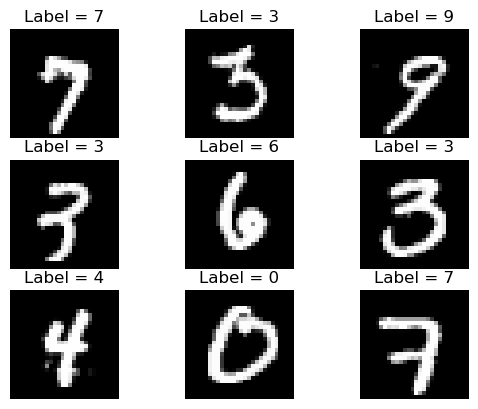

In [49]:
import matplotlib.pyplot as plt
from random import randint

# Display 9 randomly selected images
for c in range(1, 10):
    plt.subplot(3, 3,c)
    i = randint(0,X.shape[0])
    im = X.iloc[i].values.reshape((28,28))
    plt.axis("off")
    plt.title("Label = {}".format(y[i]))
    plt.imshow(im, cmap='gray')

# t-SNE

To apply t-SNE we first initialize the Scikit-learn [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE) object. 

We will reduce the dimensionality from 28x28 = 784 to just 2. We can also set the `perplexity` hyperparameter here:

In [71]:
from sklearn.manifold import TSNE

prj_tsne = TSNE(n_components=2, perplexity=800)

Next we can use the TSNE `fit_transform()` function to compute the embedding.

The result is put in a DataFrame `result` and the label is added as column `label`:

In [72]:
X_embedded = prj_tsne.fit_transform(X)

result = pd.DataFrame(X_embedded, columns=["t-SNE_1","t-SNE_2"])
result["label"] = y

In [73]:
result

,t-SNE_1,t-SNE_2,label
0,-1.350445,1.475456,1
1,-0.564583,0.356578,1
2,-2.969462,-5.505988,4
3,3.986049,2.468892,3
4,3.953255,3.274030,3
...,...,...,...
2995,-3.840846,2.004930,4
2996,0.910786,4.839171,2
2997,0.179486,3.041946,2
2998,-2.425456,0.846264,4


We can plot the result as follows:

<Axes: xlabel='t-SNE_1', ylabel='t-SNE_2'>

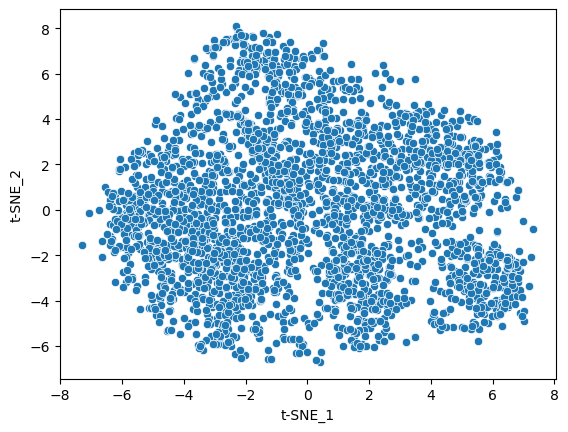

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="t-SNE_1",y="t-SNE_2",data=result)

As we have access to the true labels we can add these to the plot:

<Axes: xlabel='t-SNE_1', ylabel='t-SNE_2'>

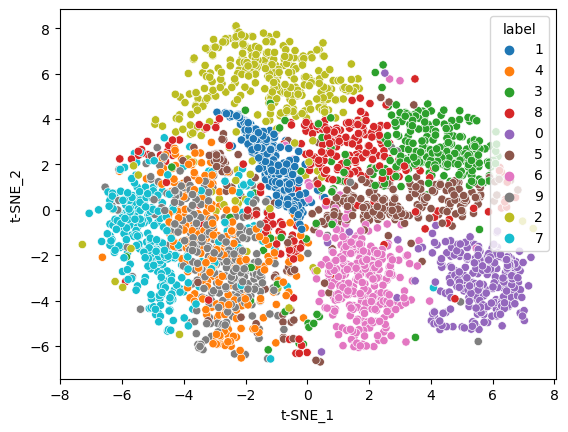

In [75]:
sns.scatterplot(x="t-SNE_1",y="t-SNE_2",hue="label",data=result)

# K-means clustering

To apply K-means clustering of the images we first initialize a Scikit-learn KMeans object.

We set the number of clusters $k = 10$ and select the initial cluster centers using K-means++: 

In [27]:
from sklearn.cluster import KMeans

cls_kmns = KMeans(n_clusters=10, init='k-means++')

Next we use the KMeans `fit_predict()` function to cluster the 784 dimensional feature vectors into 10 groups:

In [67]:
kmeans_result = cls_kmns.fit_predict(X)

result["kmeans"] = [str(x) for x in kmeans_result]

In [68]:
result

,t-SNE_1,t-SNE_2,label,kmeans
0,-9.001431,-16.498661,1,1
1,6.116887,-17.081062,1,1
2,-18.699963,48.920834,4,7
3,27.072586,13.190272,3,4
4,28.931072,6.360218,3,4
...,...,...,...,...
2995,-26.579348,2.281118,4,0
2996,-12.241403,-40.224503,2,2
2997,-2.959681,-32.848782,2,4
2998,-20.146021,4.121508,4,9


We can the t-SNE and K-means results as follows:

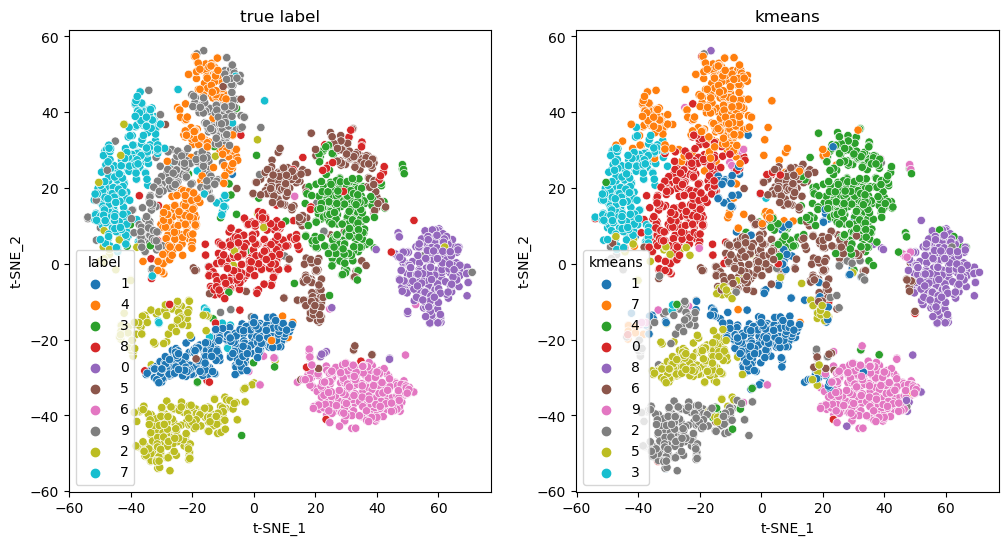

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0] = sns.scatterplot(x="t-SNE_1",y="t-SNE_2",hue="label",data=result,ax=axes[0])
axes[0].set_title("true label")
axes[1] = sns.scatterplot(x="t-SNE_1",y="t-SNE_2",hue="kmeans",data=result,ax=axes[1])
axes[1].set_title("kmeans")
plt.show()